# Customer Segmentation Analysis
# E-commerce Platform Customer Behavior

## Importing libraries and setting styles

In [57]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [58]:
# Set style for visualizations
plt.style.use('ggplot')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (12, 8)

## 1. Data Loading and Initial Exploration

In [59]:
print("1. Loading and Exploring the Dataset")
print("-"*50)

# Load the dataset
df = pd.read_csv('customer_behavior_analytcis.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Check data types and missing values
print("\nData Information:")
print(df.info())

print("\nChecking for missing values:")
print(df.isnull().sum())

# Statistical summary
print("\nStatistical Summary:")
print(df.describe())

1. Loading and Exploring the Dataset
--------------------------------------------------
Dataset Shape: (999, 6)

First 5 rows of the dataset:
   total_purchases  avg_cart_value  total_time_spent  product_click  \
0              7.0          129.34             52.17           18.0   
1             22.0           24.18              9.19           15.0   
2              2.0           32.18             90.69           50.0   
3             25.0           26.85             11.22           16.0   
4              7.0          125.45             34.19           30.0   

   discount_counts customer_id  
0              0.0     CM00000  
1              7.0     CM00001  
2              2.0     CM00002  
3             10.0     CM00003  
4              3.0     CM00004  

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_purch

## 2. Exploratory Data Analysis (EDA)



2. Exploratory Data Analysis
--------------------------------------------------


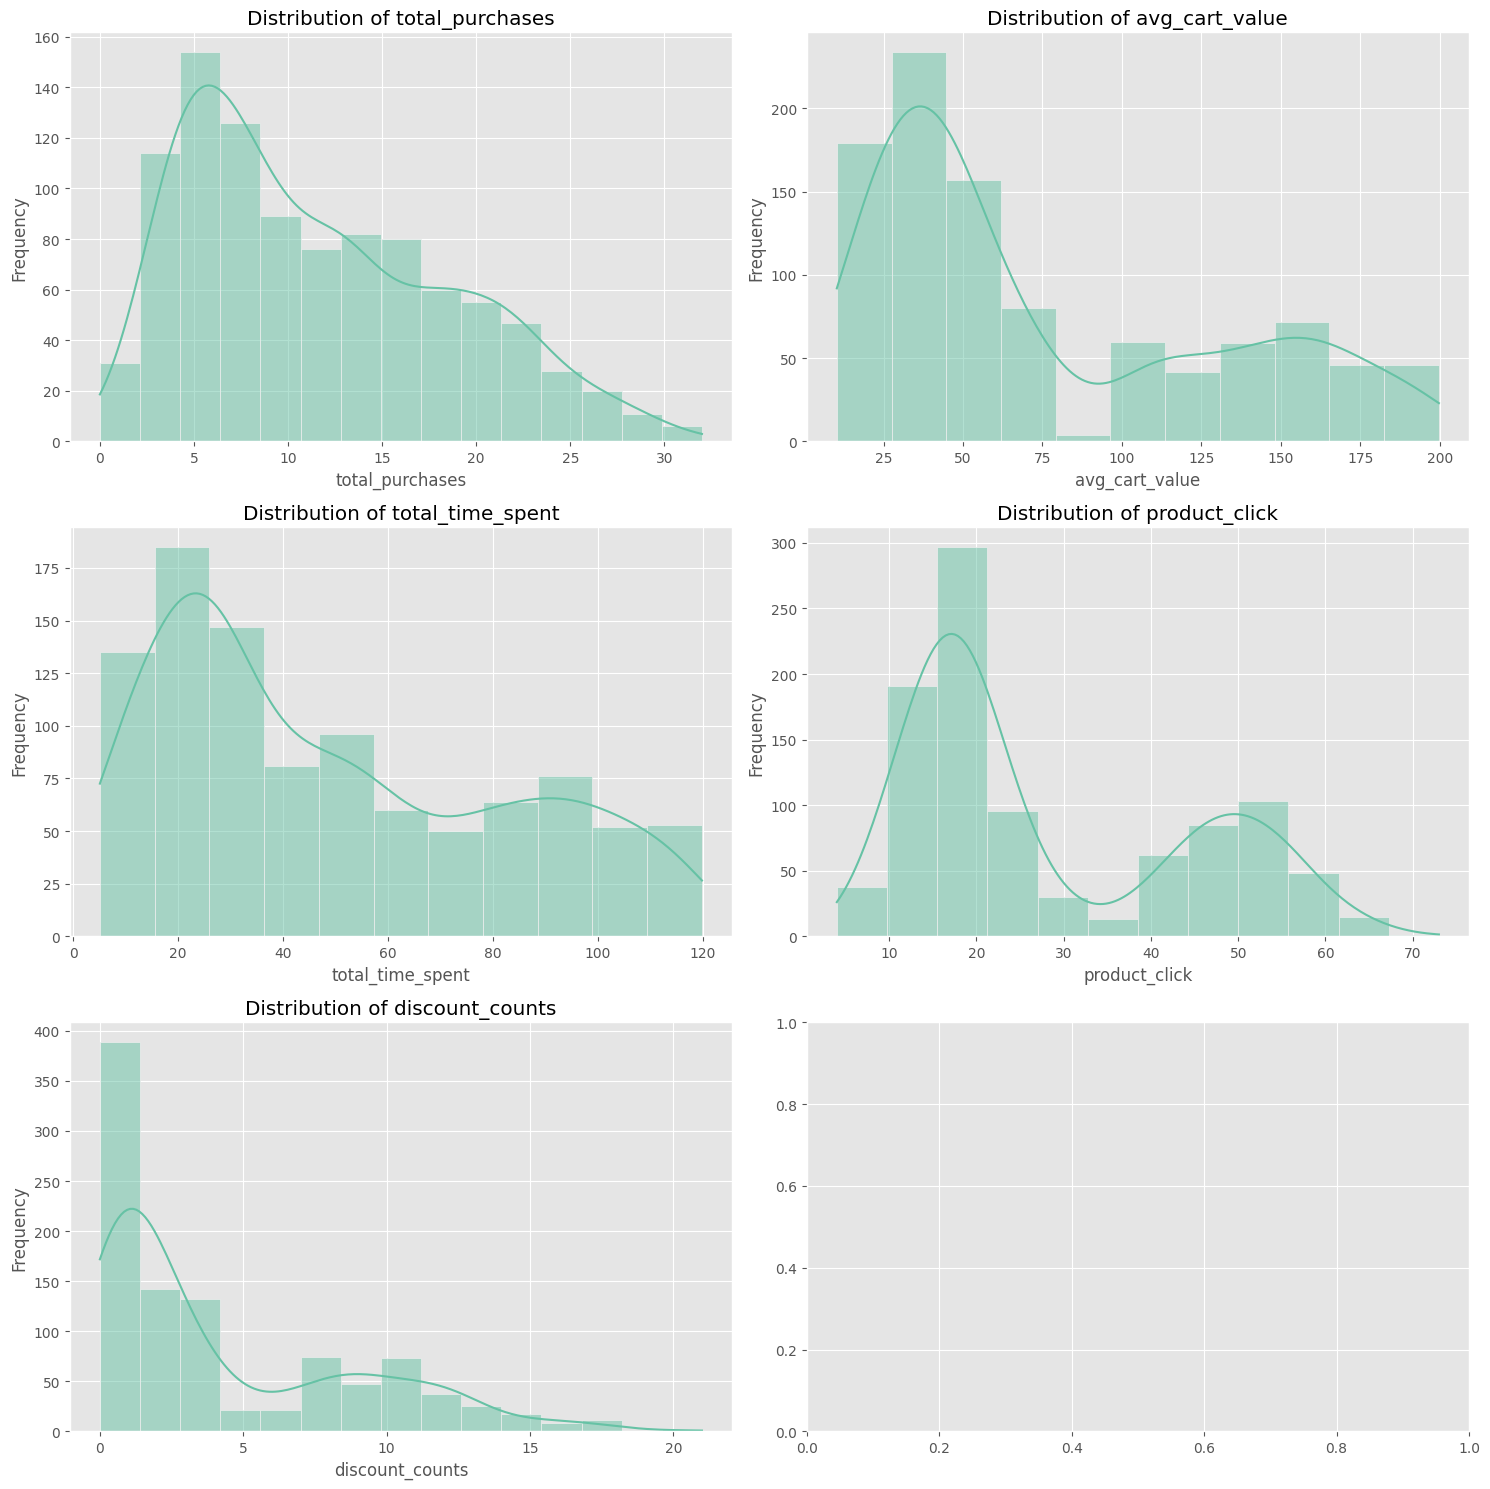


Correlation Matrix:
                  total_purchases  avg_cart_value  total_time_spent  \
total_purchases          1.000000       -0.253177         -0.752780   
avg_cart_value          -0.253177        1.000000         -0.056348   
total_time_spent        -0.752780       -0.056348          1.000000   
product_click           -0.710037       -0.209601          0.865369   
discount_counts          0.754133       -0.443685         -0.661391   

                  product_click  discount_counts  
total_purchases       -0.710037         0.754133  
avg_cart_value        -0.209601        -0.443685  
total_time_spent       0.865369        -0.661391  
product_click          1.000000        -0.581411  
discount_counts       -0.581411         1.000000  


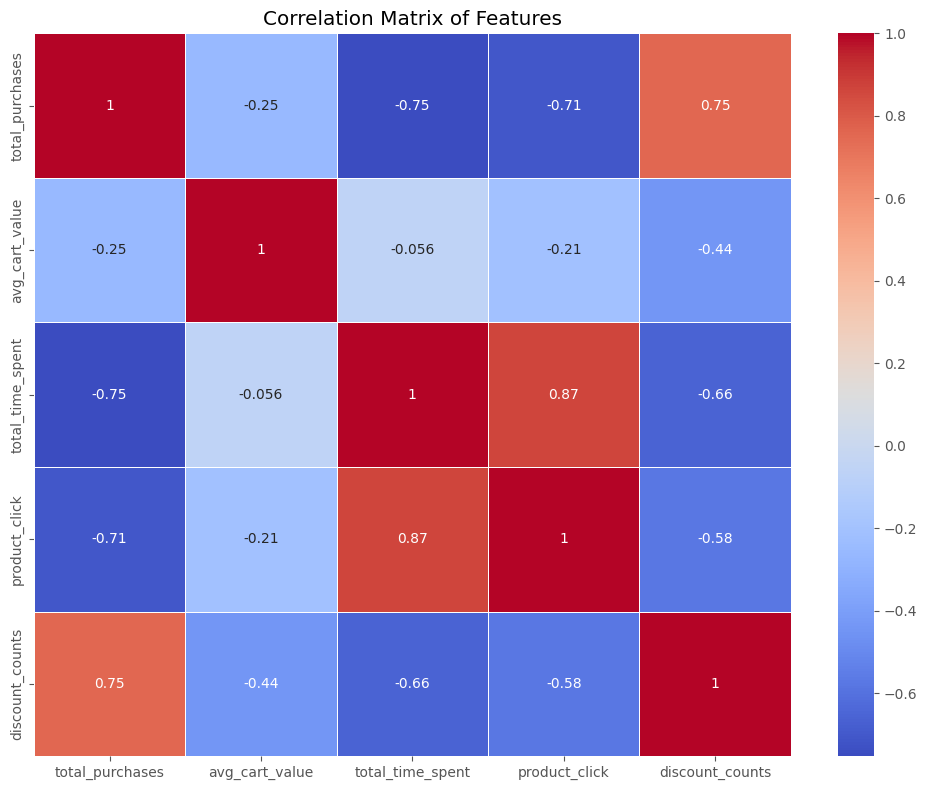


Generating pairplot to visualize feature relationships...


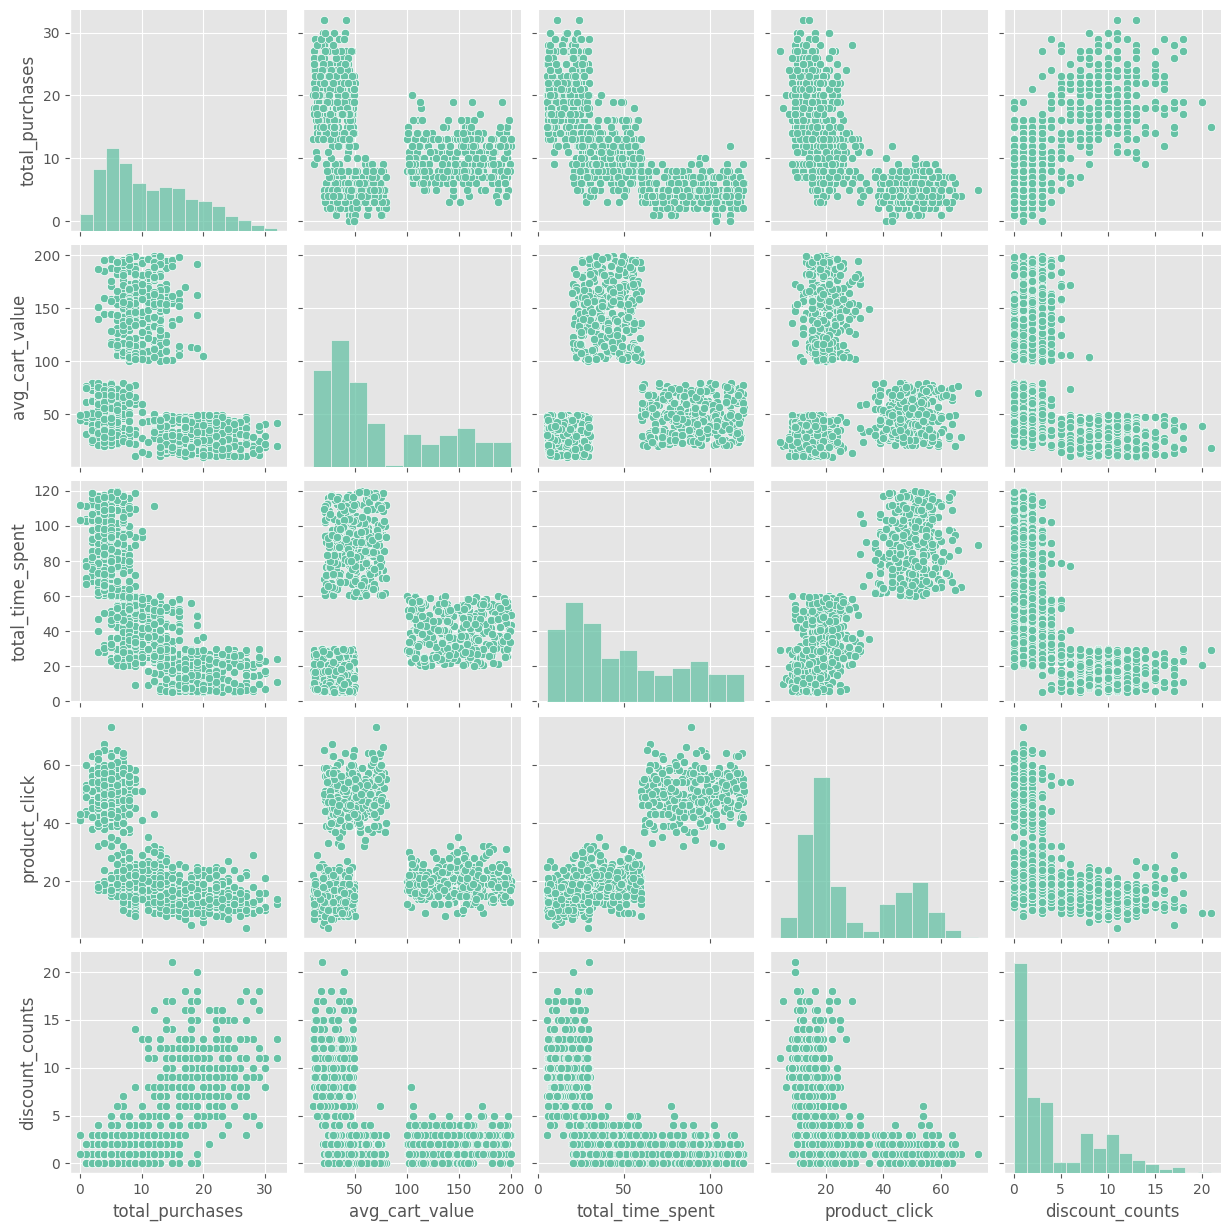

In [60]:
print("\n\n2. Exploratory Data Analysis")
print("-"*50)

# Distribution of features
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

features = ['total_purchases', 'avg_cart_value', 'total_time_spent', 
           'product_click', 'discount_counts']

for i, feature in enumerate(features):
    sns.histplot(df[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('feature_distributions.png')
plt.show()

# Correlation analysis
print("\nCorrelation Matrix:")
correlation = df[features].corr()
print(correlation)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.tight_layout()
plt.savefig('correlation_matrix.png')
plt.show()

# Pairplot to visualize relationships between features
print("\nGenerating pairplot to visualize feature relationships...")
sns.pairplot(df[features])
plt.savefig('feature_pairplot.png')
plt.show()

## 3. Feature Analysis



3. Feature Analysis
--------------------------------------------------


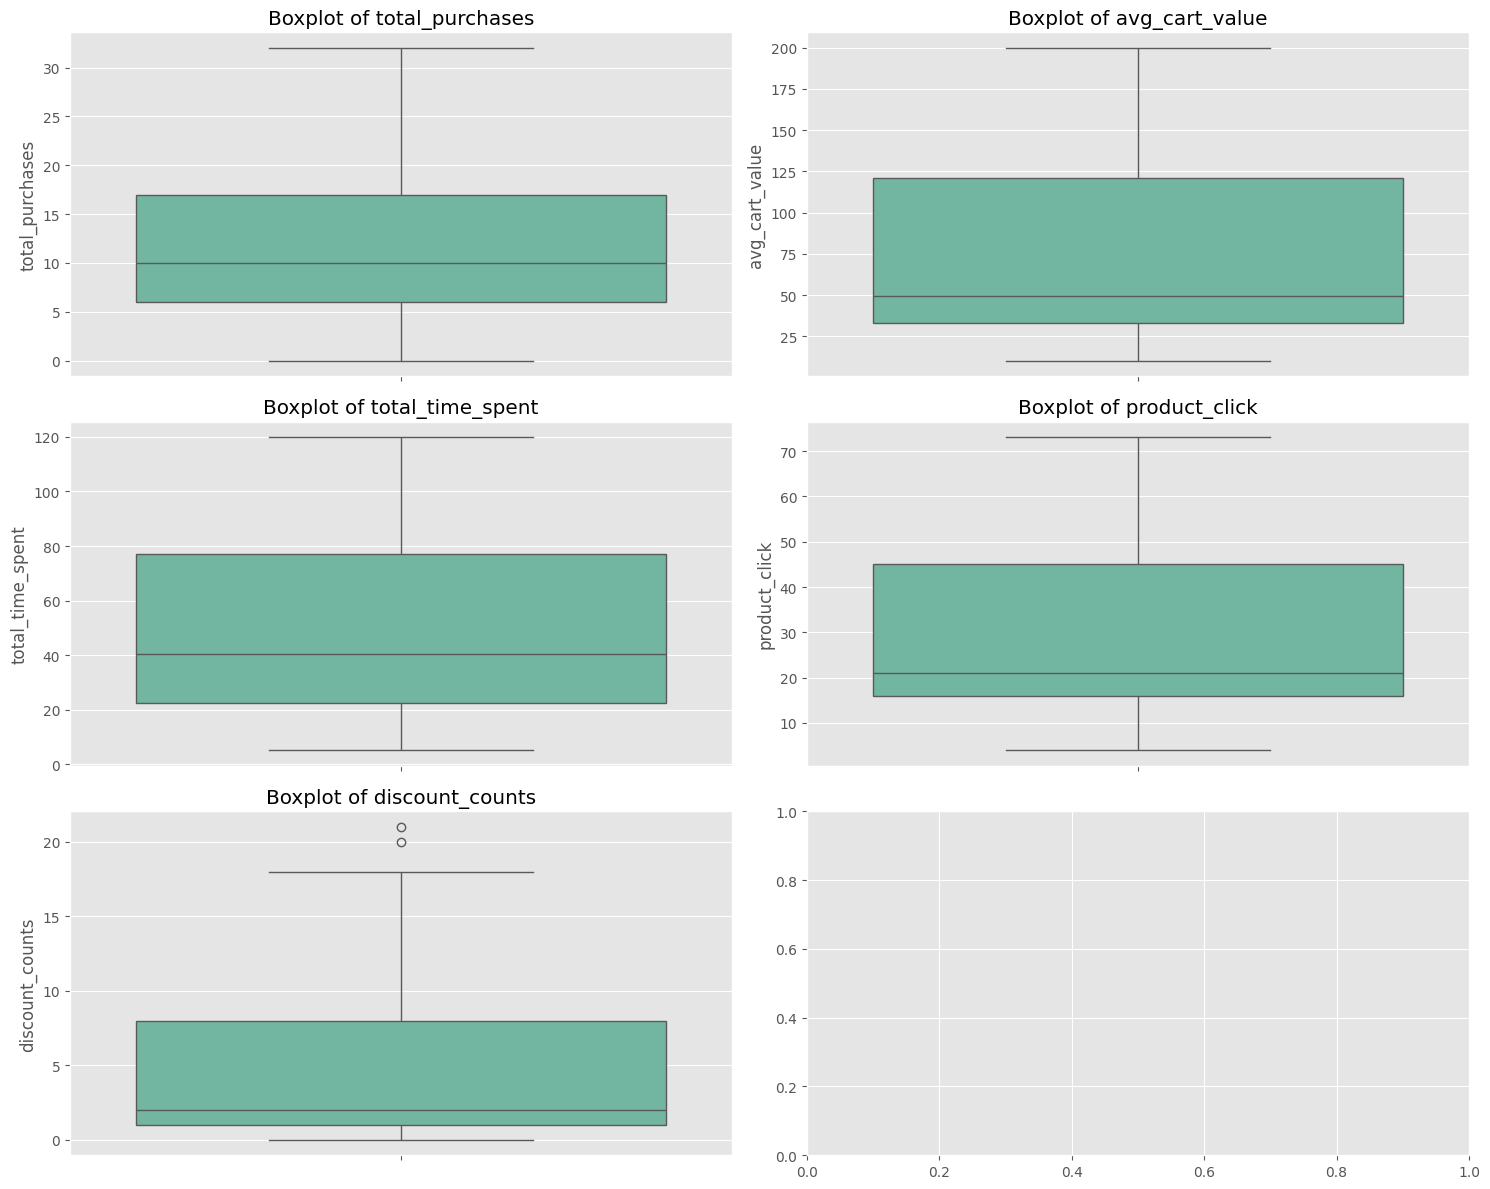


Identifying outliers in each feature:
total_purchases: 0 outliers found
avg_cart_value: 0 outliers found
total_time_spent: 0 outliers found
product_click: 0 outliers found
discount_counts: 2 outliers found


In [61]:
print("\n\n3. Feature Analysis")
print("-"*50)

# Boxplots for each feature to detect outliers
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()

for i, feature in enumerate(features):
    if i < len(axes):
        sns.boxplot(y=df[feature], ax=axes[i])
        axes[i].set_title(f'Boxplot of {feature}')
        axes[i].set_ylabel(feature)

plt.tight_layout()
plt.savefig('feature_boxplots.png')
plt.show()

# Check for and handle outliers if necessary
def identify_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return outliers

print("\nIdentifying outliers in each feature:")
for feature in features:
    outliers = identify_outliers(df, feature)
    print(f"{feature}: {len(outliers)} outliers found")

## 4. Data Preprocessing

In [62]:
print("\n\n4. Data Preprocessing")
print("-"*50)

# Save customer_id for later reference
customer_ids = df['customer_id'].copy()

# Save the data frame before preprocessing
df_original = df.copy()

# Select features for clustering
X = df[features].copy()

# Replace Nan values with median
X.fillna(X.median(), inplace=True)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df = pd.DataFrame(X_scaled, columns=features)

print("Data after standardization (first 5 rows):")
print(df.head())



4. Data Preprocessing
--------------------------------------------------
Data after standardization (first 5 rows):
   total_purchases  avg_cart_value  total_time_spent  product_click  \
0        -0.653578        0.996261          0.086238      -0.624726   
1         1.506039       -0.929454         -1.227549      -0.810415   
2        -1.373450       -0.782956          1.263694       1.355958   
3         1.937962       -0.880561         -1.165497      -0.748519   
4        -0.653578        0.925027         -0.463364       0.118031   

   discount_counts  
0        -0.952061  
1         0.593022  
2        -0.510608  
3         1.255200  
4        -0.289882  


## 5. Model Selection and Building



5. Model Selection and Building
--------------------------------------------------


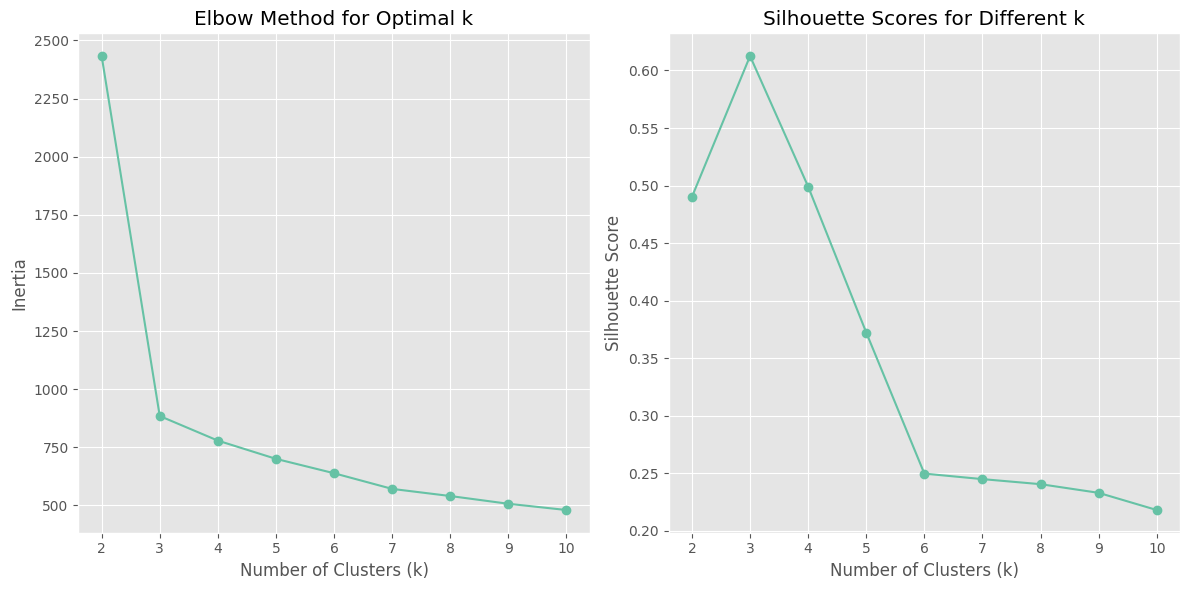


Selecting k=3 as per domain knowledge...

Cluster distribution:
cluster
0    334
2    333
1    332
Name: count, dtype: int64


In [63]:
# 5. Model Selection and Building
print("\n\n5. Model Selection and Building")
print("-"*50)

# Determine optimal number of clusters using the Elbow Method
inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    if k > 1:  # Silhouette score not defined for k=1
        silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, 'o-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'o-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k')
plt.grid(True)

plt.tight_layout()
plt.savefig('optimal_clusters.png')
plt.show()

# Based on domain knowledge, we know there are 3 clusters
# Let's proceed with k=3
print("\nSelecting k=3 as per domain knowledge...")
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original dataframe
df['cluster'] = clusters
print("\nCluster distribution:")
print(df['cluster'].value_counts())

## 6. Model Evaluation



6. Model Evaluation
--------------------------------------------------
Silhouette Score: 0.6125


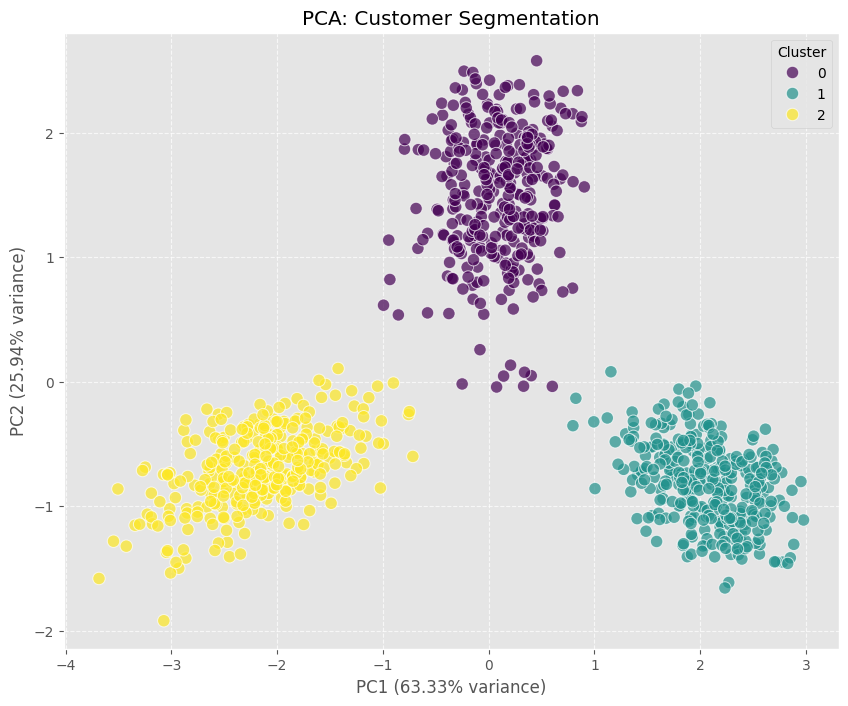

In [64]:
# 6. Model Evaluation
print("\n\n6. Model Evaluation")
print("-"*50)

# Silhouette score
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {silhouette_avg:.4f}")

# Visualize clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# Create a dataframe with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['cluster'] = clusters

# Plot PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_df, palette='viridis', s=80, alpha=0.7)
plt.title('PCA: Customer Segmentation')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.legend(title='Cluster')
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('pca_clusters.png')
plt.show()

## 7. Cluster Analysis



7. Cluster Analysis and Interpretation
--------------------------------------------------
Cluster Centers (Original Scale):
   total_purchases  avg_cart_value  total_time_spent  product_click  \
0        10.170659      144.687874         40.472126      19.925150   
1         4.924699       49.034066         90.211837      49.370482   
2        19.507508       30.798498         17.511682      15.072072   

   discount_counts  
0         1.940120  
1         1.027108  
2         9.969970  

Detailed analysis of each cluster:

Cluster 0 Statistics:
       total_purchases  avg_cart_value  total_time_spent  product_click  \
count       334.000000      334.000000        334.000000     334.000000   
mean         -0.197084        1.277315         -0.271336      -0.505566   
std           0.441634        0.589885          0.349121       0.284619   
min          -1.229475       -0.467986         -0.896810      -1.243690   
25%          -0.509603        0.797207         -0.577686      -0.686622

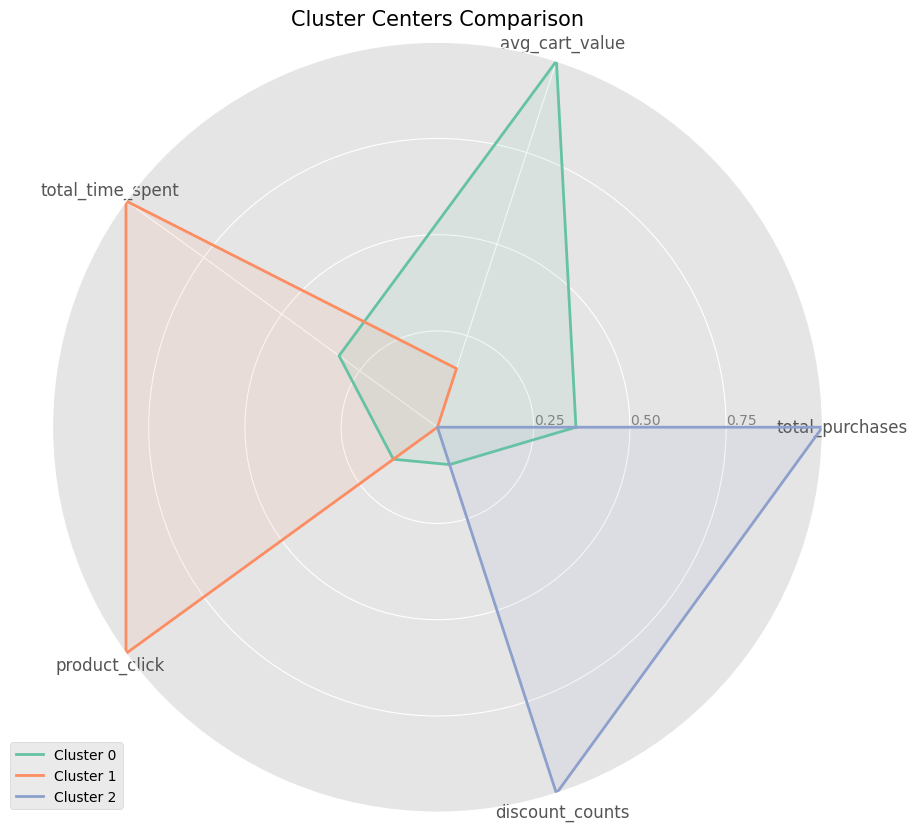


Generating bar charts to compare clusters...
Cluster Feature Means:
         total_purchases  avg_cart_value  total_time_spent  product_click  \
cluster                                                                     
0              -0.197084        1.277315         -0.271336      -0.505566   
1              -0.952368       -0.474321          1.249078       1.316994   
2               1.147184       -0.808255         -0.973177      -0.805954   

         discount_counts  
cluster                   
0              -0.523826  
1              -0.725351  
2               1.248571  


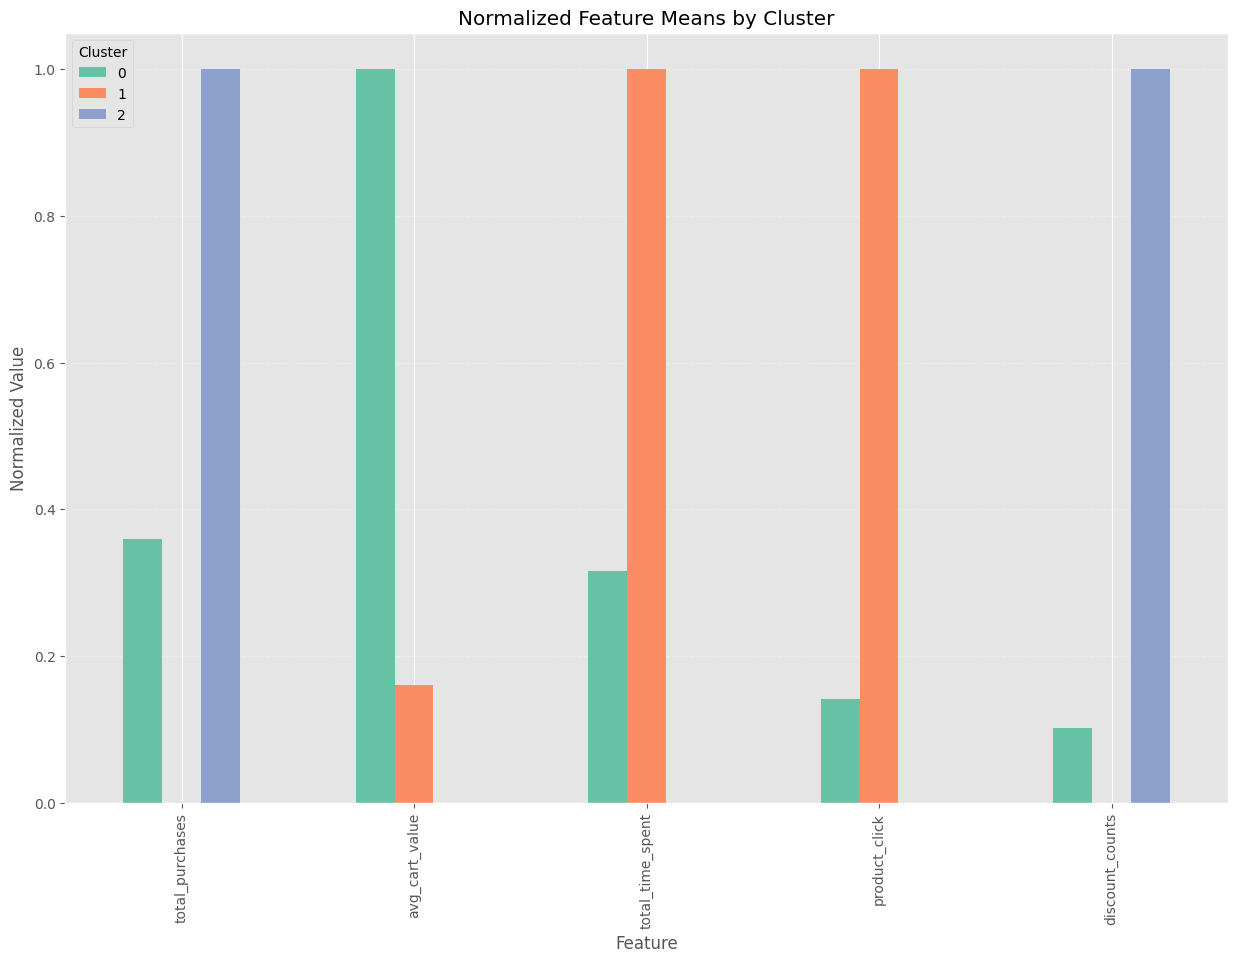

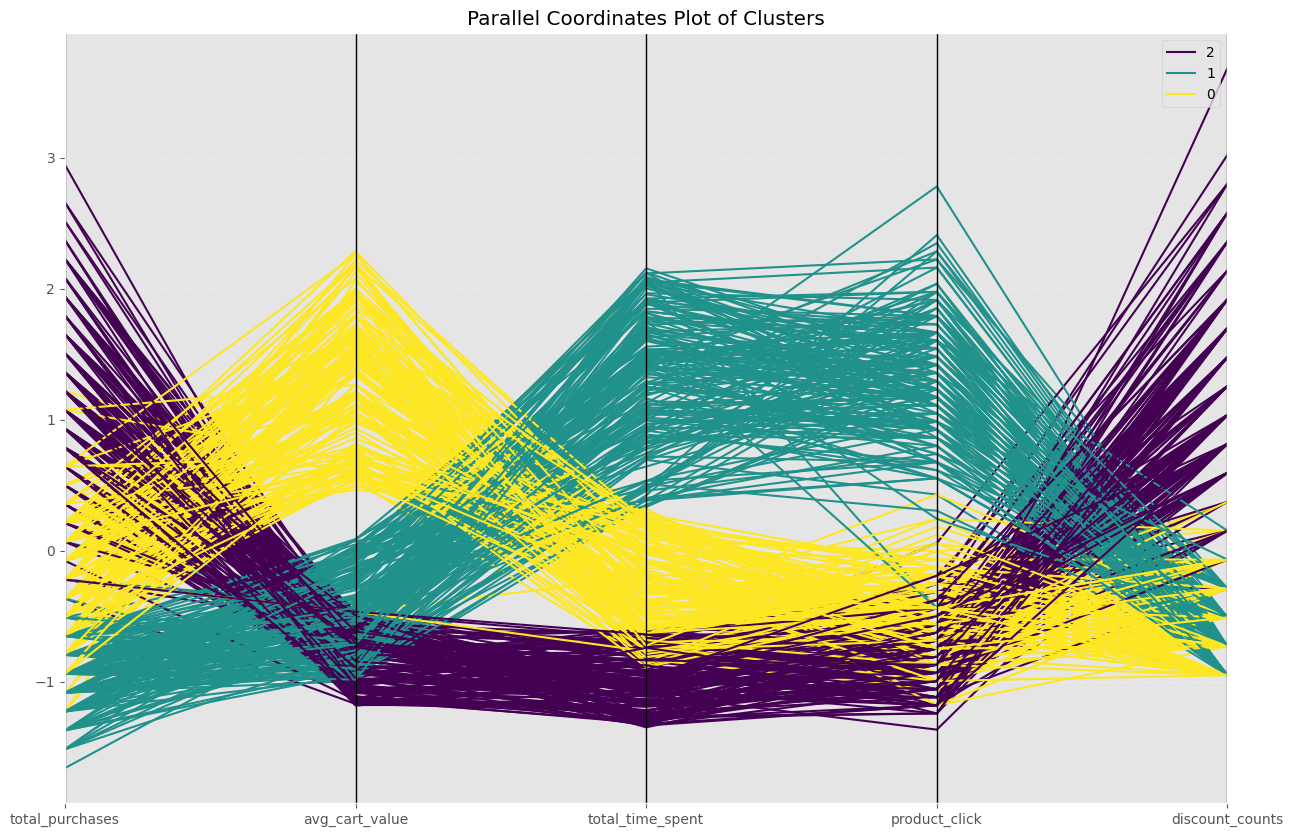

In [65]:
print("\n\n7. Cluster Analysis and Interpretation")
print("-"*50)

# Calculate cluster centers in the original feature space
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), 
                               columns=features)
print("Cluster Centers (Original Scale):")
print(cluster_centers)

# Analyze each cluster
print("\nDetailed analysis of each cluster:")
for cluster in range(3):
    print(f"\nCluster {cluster} Statistics:")
    print(df[df['cluster'] == cluster][features].describe())

# Radar chart to visualize cluster characteristics
def radar_chart(centers, features):
    # Number of variables
    N = len(features)
    
    # Compute angles for radar chart
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]  # Close the loop
    
    # Initialize the figure
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
    
    # Draw one axis per variable and add labels
    plt.xticks(angles[:-1], features, size=12)
    
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0.25, 0.5, 0.75], ["0.25", "0.50", "0.75"], color="grey", size=10)
    plt.ylim(0, 1)
    
    # Plot data
    for i, cluster_center in enumerate(centers):
        # Standardize the cluster centers for radar chart
        values = [(x - min(centers[:, j])) / (max(centers[:, j]) - min(centers[:, j])) 
                  for j, x in enumerate(cluster_center)]
        values += values[:1]  # Close the loop
        
        # Plot values
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'Cluster {i}')
        ax.fill(angles, values, alpha=0.1)
    
    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.title('Cluster Centers Comparison', size=15)
    
    return fig

# Generate radar chart
print("\nGenerating radar chart to compare cluster characteristics...")
radar_fig = radar_chart(kmeans.cluster_centers_, features)
plt.savefig('cluster_radar_chart.png')
plt.show()

# Create bar charts to compare feature means across clusters
print("\nGenerating bar charts to compare clusters...")
cluster_means = df.groupby('cluster')[features].mean()
print("Cluster Feature Means:")
print(cluster_means)

# Normalize for better visualization
normalized_means = (cluster_means - cluster_means.min()) / (cluster_means.max() - cluster_means.min())

# Plot normalized means for each feature across clusters
fig, ax = plt.subplots(figsize=(15, 10))
normalized_means.T.plot(kind='bar', ax=ax)
plt.title('Normalized Feature Means by Cluster')
plt.ylabel('Normalized Value')
plt.xlabel('Feature')
plt.legend(title='Cluster')
plt.grid(True, linestyle='--', alpha=0.3, axis='y')
plt.savefig('cluster_feature_comparison.png')
plt.show()

# Create a parallel coordinates plot to visualize all features at once
plt.figure(figsize=(15, 10))
pd.plotting.parallel_coordinates(
    df.sample(n=min(500, len(df))), 
    'cluster', 
    cols=features,
    colormap='viridis'
)
plt.title('Parallel Coordinates Plot of Clusters')
plt.grid(True, linestyle='--', alpha=0.3)
plt.savefig('parallel_coordinates.png')
plt.show()

## 8. Cluster Identification and Labeling



8. Cluster Identification and Labeling
--------------------------------------------------

Distribution of Customer Segments:
cluster_label
High Spenders      334
Bargain Hunters    333
Window Shoppers    332
Name: count, dtype: int64

Cluster ID to Label Mapping:
Cluster 0 -> High Spenders
Cluster 1 -> Window Shoppers
Cluster 2 -> Bargain Hunters


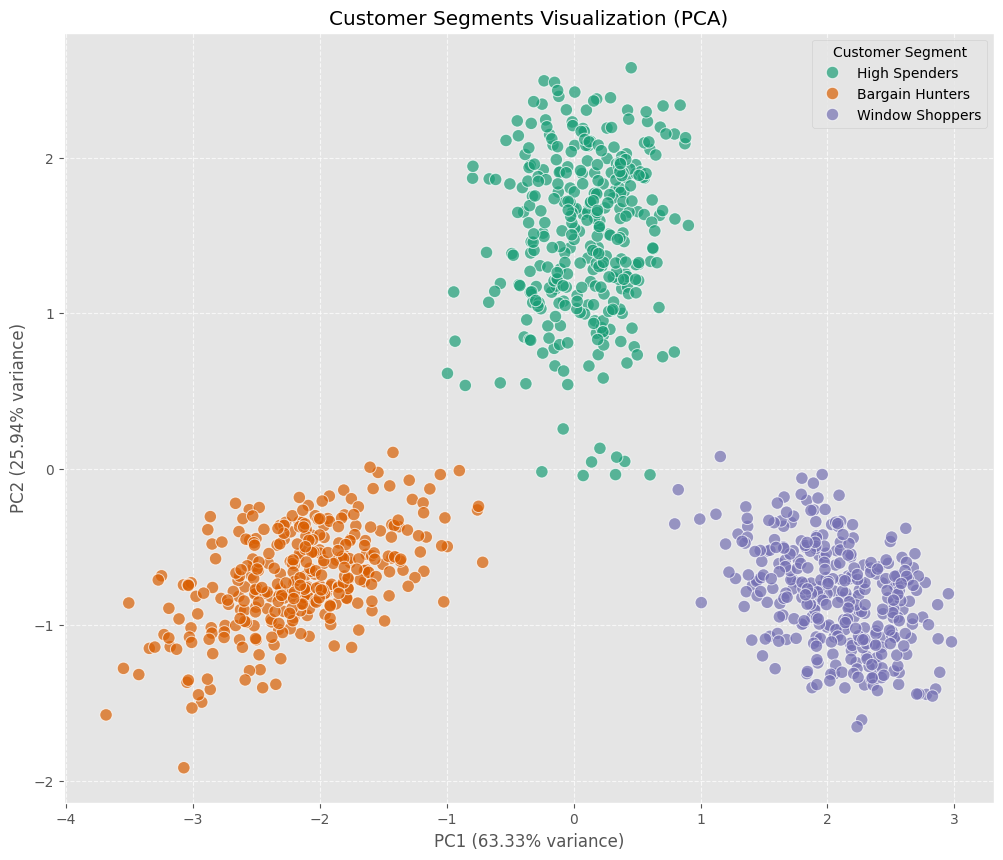

In [66]:
# 8. Cluster Identification and Labeling
print("\n\n8. Cluster Identification and Labeling")
print("-"*50)

# Based on the analysis and the provided description, identify the clusters:
# - Bargain Hunters: High purchases, Low cart value, Moderate time spent, Moderate clicks, High discount usage
# - High Spenders: Moderate purchases, High cart value, Moderate time spent, Moderate clicks, Low discount usage
# - Window Shoppers: Low purchases, Moderate cart value, High time spent, High clicks, Low discount usage

# Map numeric clusters to meaningful labels
def identify_cluster_label(row):
    if row['cluster'] == 2:
        return 'Bargain Hunters'
    elif row['cluster'] == 0:
        return 'High Spenders'
    else:
        return 'Window Shoppers'

# Apply the function to label each cluster
df['cluster_label'] = df.apply(identify_cluster_label, axis=1)

# Print the distribution of labeled clusters
print("\nDistribution of Customer Segments:")
print(df['cluster_label'].value_counts())

# Map cluster IDs to labels
cluster_mapping = {}
for cluster in range(3):
    most_common_label = df[df['cluster'] == cluster]['cluster_label'].mode()[0]
    cluster_mapping[cluster] = most_common_label

print("\nCluster ID to Label Mapping:")
for cluster_id, label in cluster_mapping.items():
    print(f"Cluster {cluster_id} -> {label}")

# Visualize the final labeled clusters using PCA
pca_df['cluster_label'] = df['cluster_label']

plt.figure(figsize=(12, 10))
sns.scatterplot(x='PC1', y='PC2', hue='cluster_label', data=pca_df, palette='Dark2', s=80, alpha=0.7)
plt.title('Customer Segments Visualization (PCA)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.legend(title='Customer Segment')
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('labeled_clusters_pca.png')
plt.show()

## 9. Final Results and Summary



9. Final Results and Summary
--------------------------------------------------
Customer Segment Profile Summary:
                 total_purchases  avg_cart_value  total_time_spent  \
cluster_label                                                        
Bargain Hunters             1.15           -0.81             -0.97   
High Spenders              -0.20            1.28             -0.27   
Window Shoppers            -0.95           -0.47              1.25   

                 product_click  discount_counts  
cluster_label                                    
Bargain Hunters          -0.81             1.25  
High Spenders            -0.51            -0.52  
Window Shoppers           1.32            -0.73  

Sample of customers with their segment labels (first 10 rows):
  customer_id  total_purchases  avg_cart_value  total_time_spent  \
0     CM00000              7.0          129.34             52.17   
1     CM00001             22.0           24.18              9.19   
2     CM00002  

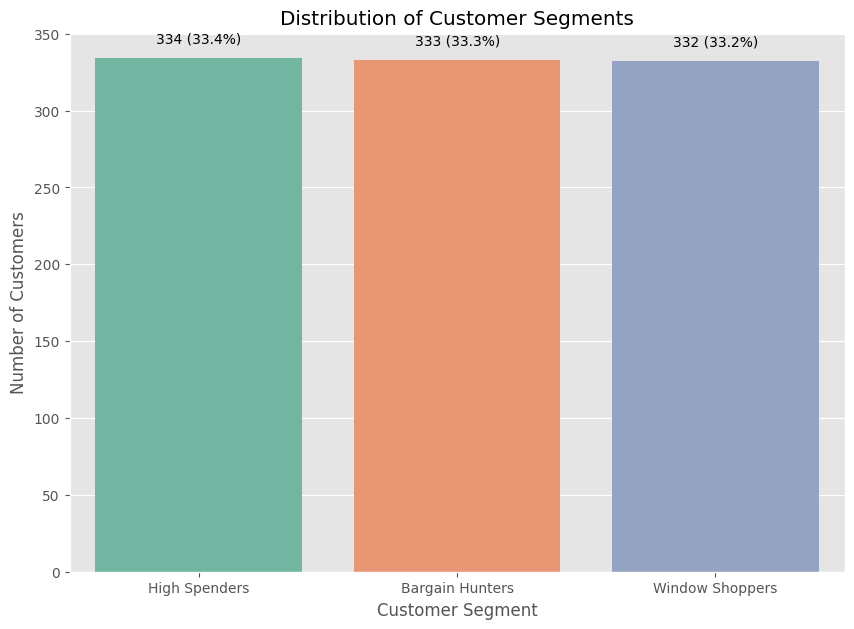

In [67]:
print("\n\n9. Final Results and Summary")
print("-"*50)

# Create a summary of each segment
segment_summary = df.groupby('cluster_label')[features].mean().round(2)
print("Customer Segment Profile Summary:")
print(segment_summary)

# Create a summary dataframe with original data and cluster labels
summary_df = df_original[['customer_id', 'total_purchases', 'avg_cart_value', 
                'total_time_spent', 'product_click', 'discount_counts']]
summary_df['cluster_label'] = df['cluster_label']


print("\nSample of customers with their segment labels (first 10 rows):")
print(summary_df.head(10))

# Calculate percentage of customers in each segment
segment_percent = df['cluster_label'].value_counts(normalize=True) * 100
print("\nPercentage of Customers in Each Segment:")
for segment, percentage in segment_percent.items():
    print(f"{segment}: {percentage:.2f}%")

# Visualize customer segment distribution
plt.figure(figsize=(10, 7))
sns.countplot(x='cluster_label', data=df, palette='Set2')
plt.title('Distribution of Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
for i, count in enumerate(df['cluster_label'].value_counts()):
    plt.text(i, count + 10, f"{count} ({count/len(df)*100:.1f}%)", ha='center')
plt.savefig('customer_segment_distribution.png')
plt.show()

## 10. Save Results

In [68]:
print("\n\n10. Saving Results")
print("-"*50)

# Save the segmented customer data to a CSV file
summary_df.to_csv('customer_segments_results.csv', index=False)
print("Results saved to 'customer_segments_results.csv'")

print("\nAnalysis Complete!")

# Print a summary for the report
print("\n" + "="*50)
print("SUMMARY FOR REPORT")
print("="*50)
print(f"Total customers analyzed: {len(df)}")
print(f"Number of customer segments identified: {len(df['cluster_label'].unique())}")
for label, count in df['cluster_label'].value_counts().items():
    print(f"- {label}: {count} customers ({count/len(df)*100:.1f}%)")



10. Saving Results
--------------------------------------------------
Results saved to 'customer_segments_results.csv'

Analysis Complete!

SUMMARY FOR REPORT
Total customers analyzed: 999
Number of customer segments identified: 3
- High Spenders: 334 customers (33.4%)
- Bargain Hunters: 333 customers (33.3%)
- Window Shoppers: 332 customers (33.2%)
